In [1]:
!nvidia-smi

Fri May  5 16:05:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow keras_cv --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.9/634.9 kB 11.6 MB/s eta 0:00:00


In [2]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 22 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,153 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 5s (82.5 MB/s)
(Reading database ... 122518 files and directories currently installed.)
Removing libcudnn8-dev (8.7.0.84-1+cuda11.8) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122485 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.7

In [3]:
!apt-cache policy libcudnn8

libcudnn8:
  Installed: 8.7.0.84-1+cuda11.8
  Candidate: 8.9.0.131-1+cuda12.1
  Version table:
     8.9.0.131-1+cuda12.1 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.9.0.131-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.1.3-1+cuda12.0 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.1.3-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.0.121-1+cuda12.0 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
     8.8.0.121-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
 *** 8.7.0.84-1+cuda11.8 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages
        100 /var/lib/

In [8]:
# local setup
# !export PATH=/usr/local/cuda-11.2/bin${PATH:+:${PATH}}
# !export LD_LIBRARY_PATH=/usr/local/cuda-11.2/lib64:$LD_LIBRARY_PATH
# !export LD_LIBRARY_PATH=/usr/local/cuda-11.2/include:$LD_LIBRARY_PATH
# !export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

In [4]:
import time
import keras_cv
import tensorflow as tf
import matplotlib.pyplot as plt

You do not have Waymo Open Dataset installed, so KerasCV Waymo metrics are not available.


In [6]:
tf.keras.mixed_precision.set_global_policy("mixed_float16")

model = keras_cv.models.StableDiffusion(img_width=512, img_height=512, jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


50/50 [==============================] - 31s 614ms/step


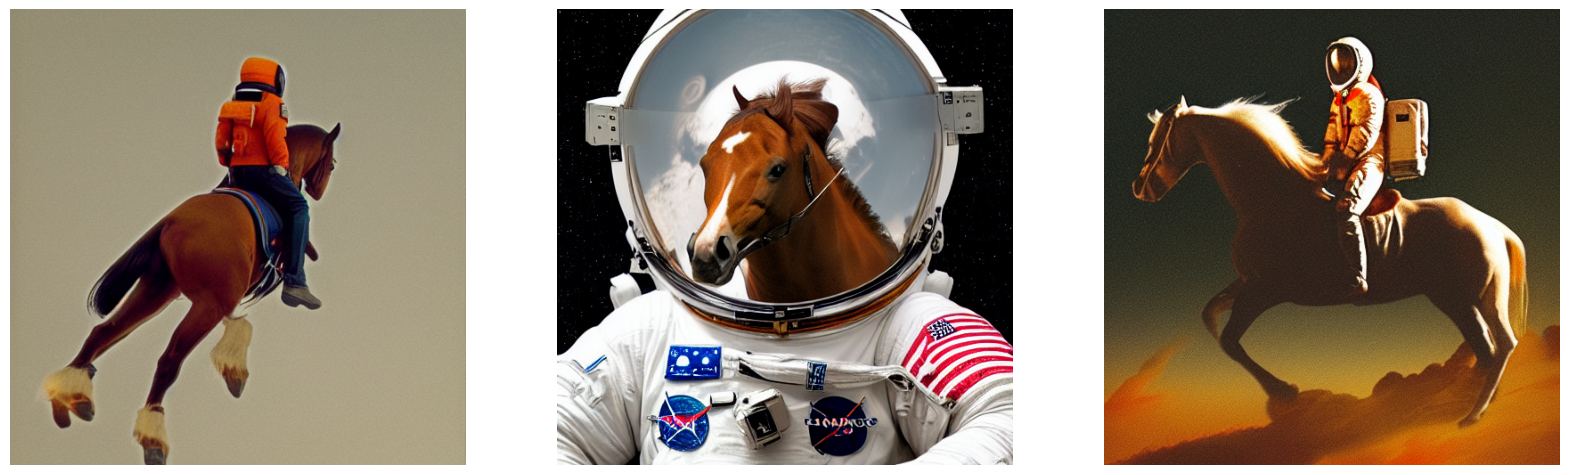

In [8]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)

def plot_images(images):
  plt.figure(figsize=(20, 20))
  for i in range(len(images)):
    ax = plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plot_images(images)

50/50 [==============================] - 30s 601ms/step


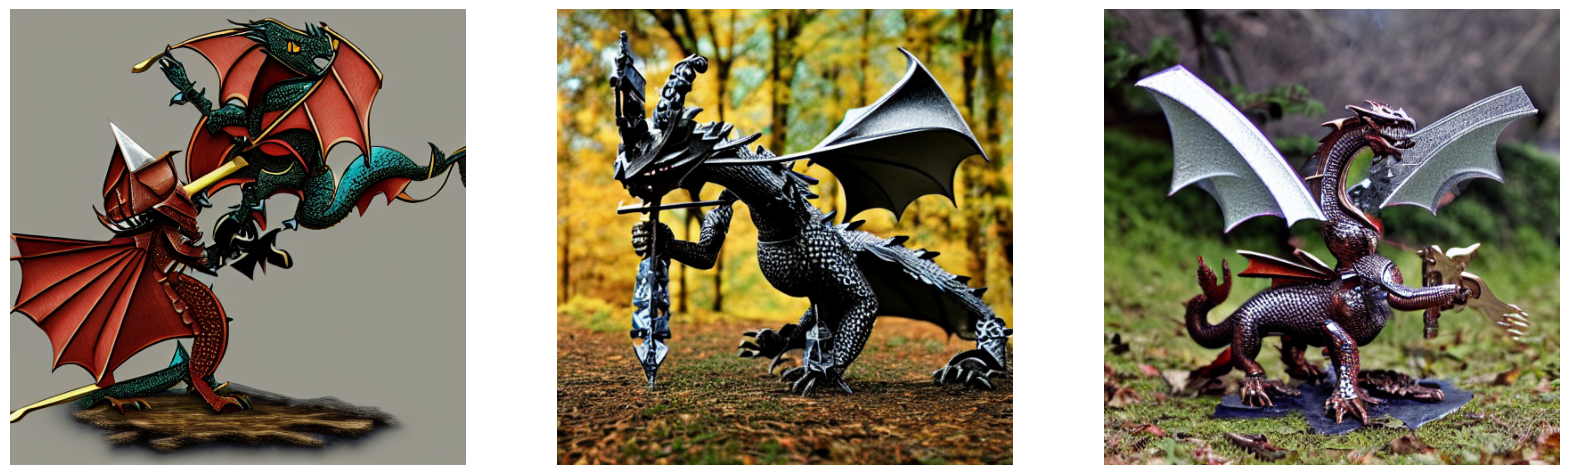

In [9]:
images = model.text_to_image("metalic dragon fighting a wood knight", batch_size=3)

def plot_images(images):
  plt.figure(figsize=(20, 20))
  for i in range(len(images)):
    ax = plt.subplot(1, len(images), i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plot_images(images)